In [108]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


## Downliad the financial data of TCS,INFY,HCLTECH,WIPRO and TECHM

In [109]:
tech_list = ['TCS.NS','INFY.NS','HCLTECH.NS','WIPRO.NS','TECHM.NS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing iex finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    stk_name = stock.split(".")[0]
    globals()[stk_name] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [110]:
box_df = pd.concat([TCS["Close"],INFY["Close"],HCLTECH["Close"],WIPRO["Close"],TECHM["Close"]],axis = 1)
box_df

Ticker,TCS.NS,INFY.NS,HCLTECH.NS,WIPRO.NS,TECHM.NS
Date,,,,,
2024-10-29,3938.260010,1786.431763,1803.183228,270.306335,1636.043213
2024-10-30,3947.343750,1750.300903,1771.440430,271.772766,1622.991577
2024-10-31,3835.050049,1706.740112,1701.355469,265.306000,1563.415161
2024-11-01,3850.270508,1710.236572,1693.022217,265.089630,1558.555908
2024-11-04,3830.894531,1712.956299,1698.368896,260.017151,1592.328735
...,...,...,...,...,...
2025-10-23,3073.199951,1505.453247,1523.900024,244.300003,1463.400024
2025-10-24,3063.199951,1502.400024,1523.800049,242.979996,1453.699951
2025-10-27,3084.899902,1504.500000,1533.500000,243.910004,1462.800049


In [111]:
# Data first 5 rows
TCS.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2024-10-29,3938.260010,3965.560383,3923.619373,3958.167633,1445885
2024-10-30,3947.343750,3968.942546,3923.570824,3938.018231,1935002
2024-10-31,3835.050049,3941.207523,3826.884144,3933.186481,3740372
2024-11-01,3850.270508,3864.524684,3842.394566,3855.730724,154895
2024-11-04,3830.894531,3857.711712,3781.705635,3832.972400,2269192


In [112]:
# Data basic statistical measures
TCS.describe()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,3512.691143,3546.319906,3483.695185,3516.370695,2.604044e+06
std,407.173283,414.431973,400.913371,407.792836,1.255270e+06
min,2877.667236,2904.467428,2855.948356,2880.257593,0.000000e+00
25%,3145.468506,3161.907190,3113.985899,3133.313773,1.776233e+06
50%,3428.099609,3461.101659,3402.265226,3430.519958,2.418271e+06
75%,3947.343750,3995.035122,3892.380490,3956.766186,3.116051e+06
max,4323.508789,4343.802870,4277.219259,4309.110184,8.817365e+06


In [113]:
# Data information
TCS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-10-29 to 2025-10-29
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TCS.NS)   249 non-null    float64
 1   (High, TCS.NS)    249 non-null    float64
 2   (Low, TCS.NS)     249 non-null    float64
 3   (Open, TCS.NS)    249 non-null    float64
 4   (Volume, TCS.NS)  249 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


## Plotting closing price of TCS stock for last 1 year

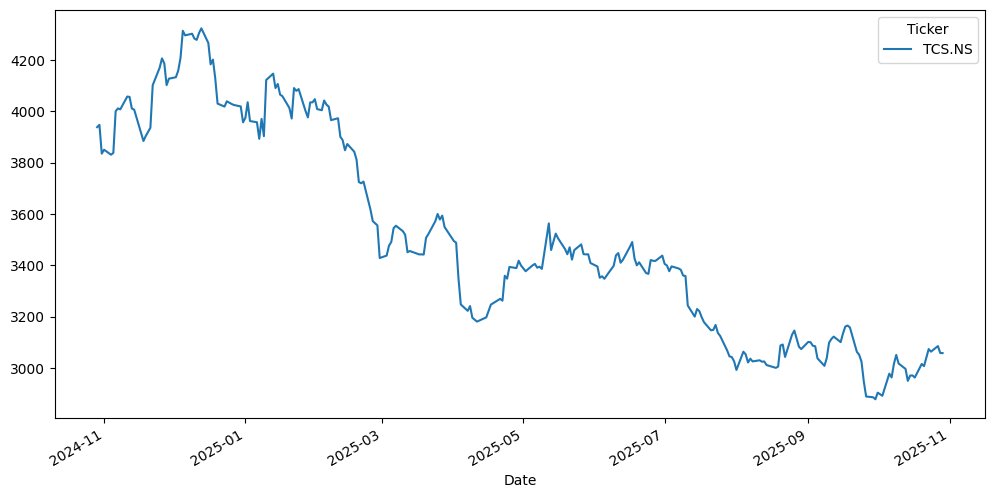

In [114]:
TCS['Close'].plot(legend=True, figsize = (12,6))
plt.show()

## Plotting volume  of TCS stock for last 1 year

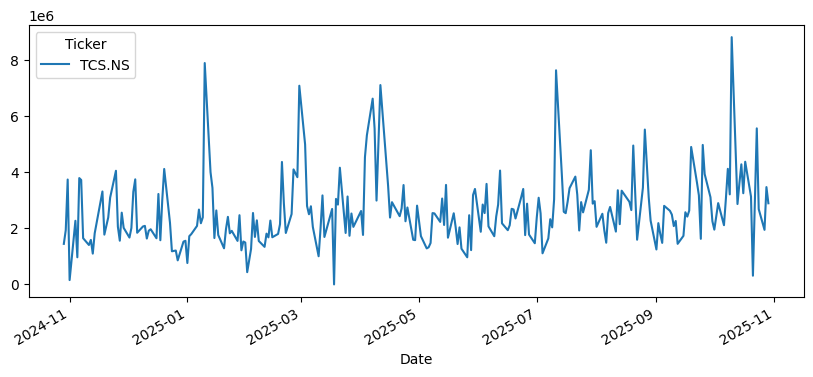

In [115]:
TCS['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

## Moving Average(10MA,20MA,50MA)

In [116]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    TCS[column_name]=pd.DataFrame.rolling(TCS['Close'],ma).mean()

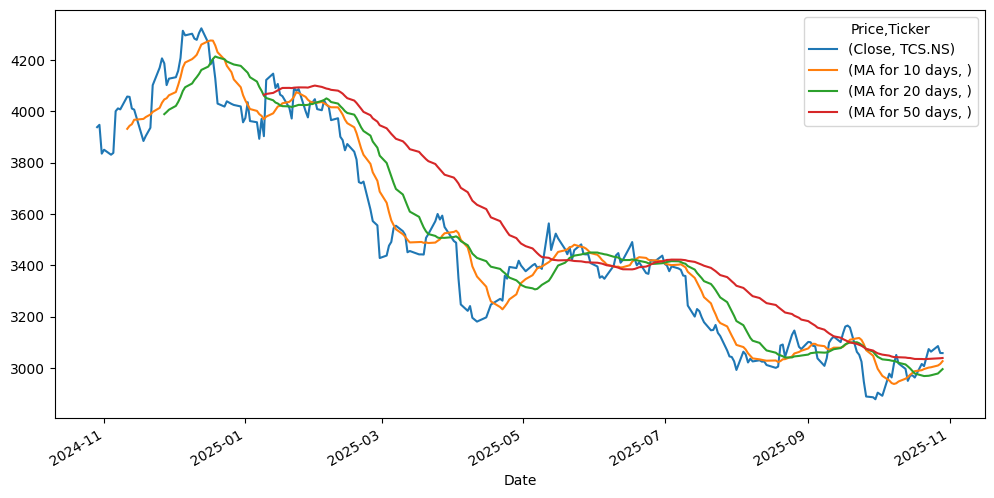

In [117]:
TCS[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

## Daily percent change over a year

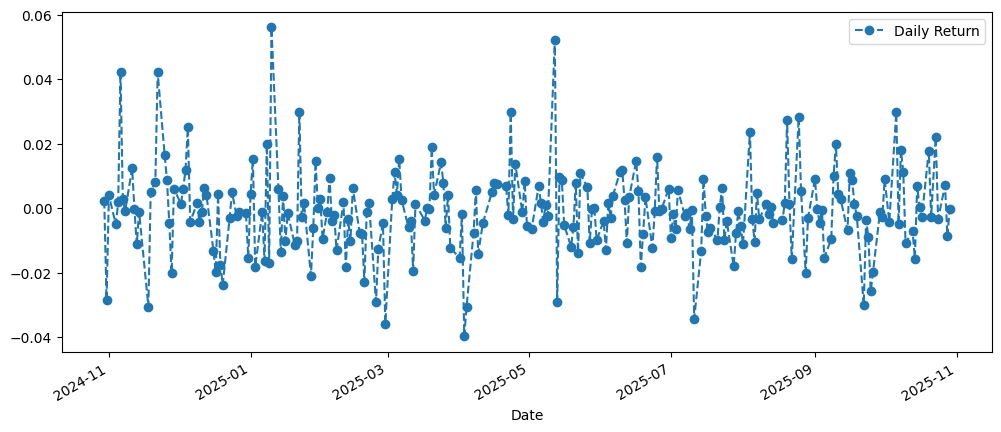

In [118]:

TCS['Daily Return'] = TCS['Close'].pct_change()

TCS['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

## Cumulative return over a year

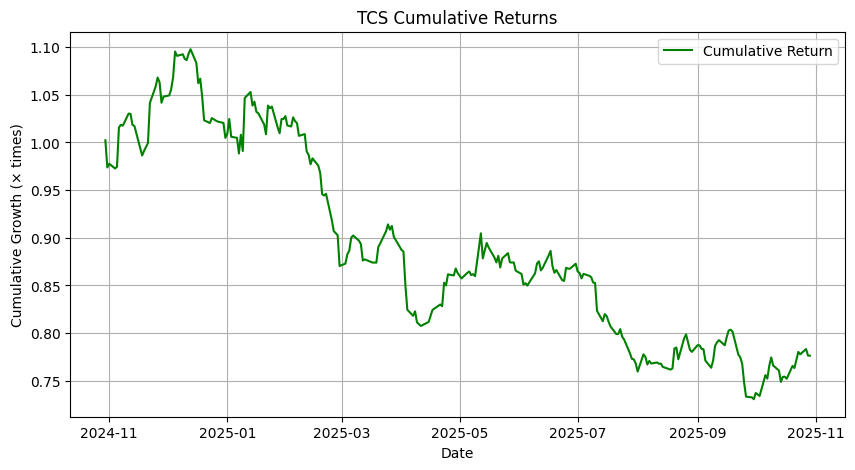

In [119]:
TCS['Cumulative Return'] = (1 + TCS['Daily Return']).cumprod()
plt.figure(figsize=(10,5))
plt.plot(TCS['Cumulative Return'], label='Cumulative Return', color='green')
plt.title('TCS Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth (× times)')
plt.legend()
plt.grid(True)
plt.show()



## Price Volatility of Rolling 20 days for a year OF TCS

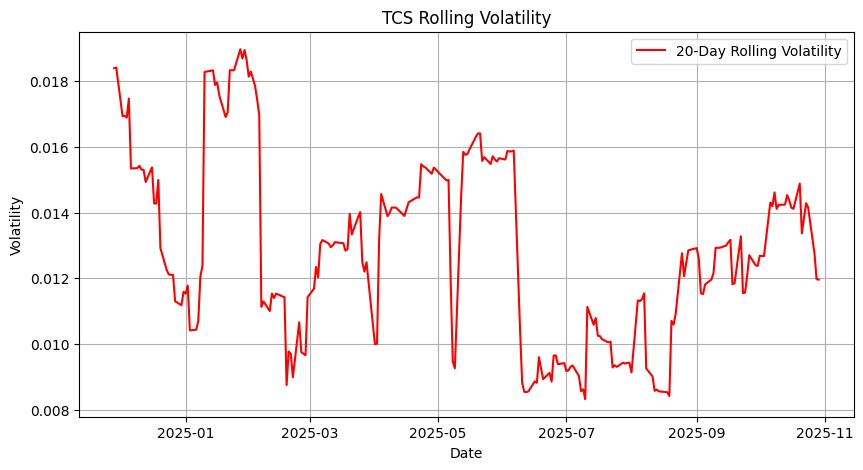

In [120]:
TCS['Rolling Volatility'] = TCS['Daily Return'].rolling(window=20).std()
plt.figure(figsize=(10,5))
plt.plot(TCS['Rolling Volatility'], label='20-Day Rolling Volatility', color='red')
plt.title('TCS Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


## Price Volatility of Rolling 20 days for a year Before Scaling

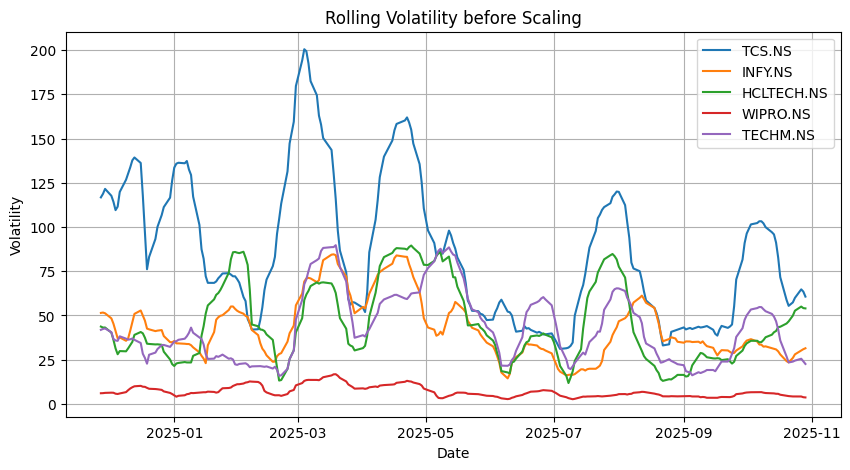

In [121]:
box_df = pd.concat([TCS["Close"],INFY["Close"],HCLTECH["Close"],WIPRO["Close"],TECHM["Close"]],axis = 1).dropna()



daily_volatiliy = box_df.rolling(window=20).std().dropna()

plt.figure(figsize=(10,5))
plt.plot(daily_volatiliy)
plt.title('Rolling Volatility before Scaling')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(daily_volatiliy.columns)
plt.grid(True)
plt.show()



## Prive Volatility of Rolling 20 days for a year After Scaling

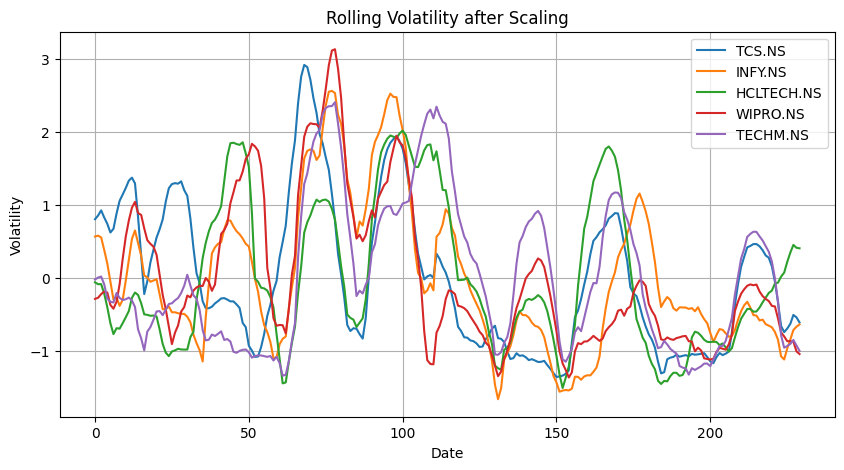

In [122]:
box_df = pd.concat([TCS["Close"],INFY["Close"],HCLTECH["Close"],WIPRO["Close"],TECHM["Close"]],axis = 1).dropna()

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()



daily_volatiliy = box_df.rolling(window=20).std().dropna()

bx = scale.fit_transform(daily_volatiliy)

plt.figure(figsize=(10,5))
plt.plot(bx)
plt.title('Rolling Volatility after Scaling')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(daily_volatiliy.columns)
plt.grid(True)
plt.show()



## TCS Daily returns for last one year

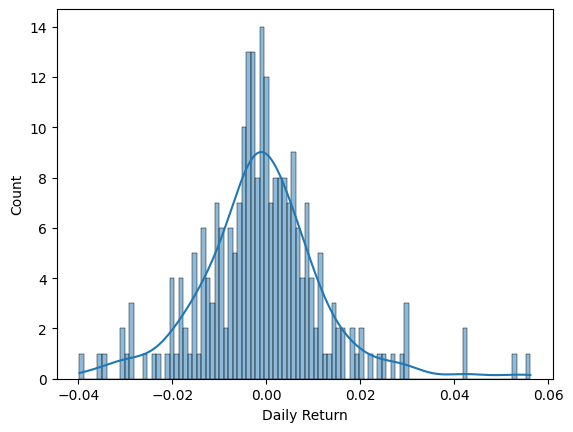

In [125]:
sns.histplot(TCS['Daily Return'].dropna(), bins=100, kde=True)
plt.show()

In [126]:
closing_df1 = pd.DataFrame(TCS['Close'])
close1  = closing_df1.rename(columns={"Close": "TCS_close"})

closing_df2 = pd.DataFrame(TECHM['Close'])
close2  = closing_df2.rename(columns={"Close": "TECHM_close"})

closing_df3 = pd.DataFrame(INFY['Close'])
close3  = closing_df3.rename(columns={"Close": "INFY_close"})

closing_df4 = pd.DataFrame(WIPRO['Close'])
close4  = closing_df4.rename(columns={"Close": "WIPRO_close"})

closing_df5 = pd.DataFrame(HCLTECH['Close'])
close5  = closing_df5.rename(columns={"Close": "HCLTECH_close"})

closing_df = pd.concat([close1, close2, close3, close4 , close5], axis=1)
closing_df.head()

Ticker,TCS.NS,TECHM.NS,INFY.NS,WIPRO.NS,HCLTECH.NS
Date,,,,,
2024-10-29,3938.260010,1636.043213,1786.431763,270.306335,1803.183228
2024-10-30,3947.343750,1622.991577,1750.300903,271.772766,1771.440430
2024-10-31,3835.050049,1563.415161,1706.740112,265.306000,1701.355469
2024-11-01,3850.270508,1558.555908,1710.236572,265.089630,1693.022217
2024-11-04,3830.894531,1592.328735,1712.956299,260.017151,1698.368896


## TCS plot showing a perfect correlation with itself

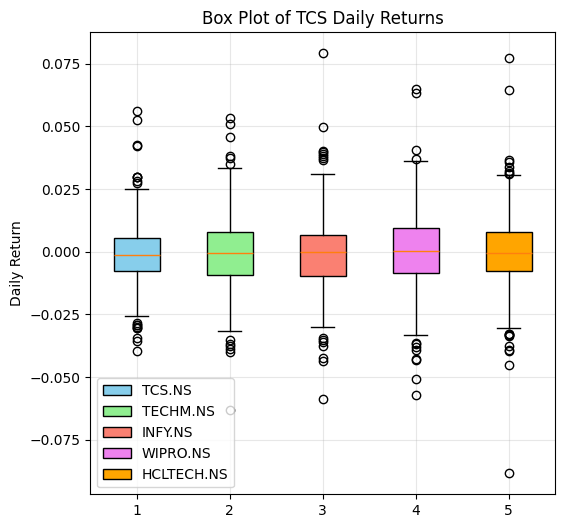

In [135]:
from sklearn.preprocessing import StandardScaler

return_daily = closing_df.pct_change().dropna()

colors = ['skyblue', 'lightgreen', 'salmon', 'violet', 'orange']



#box_df.plot(kind = "box")
plt.figure(figsize=(6, 6))
box = plt.boxplot(return_daily,patch_artist=True) 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


plt.title("Box Plot of TCS Daily Returns")
plt.ylabel("Daily Return")
plt.legend(return_daily.columns)
plt.grid(True, alpha=0.3)
plt.show()


## Plot showing a correlation between TCS,INFy,HCL,TECHM,WIPRO

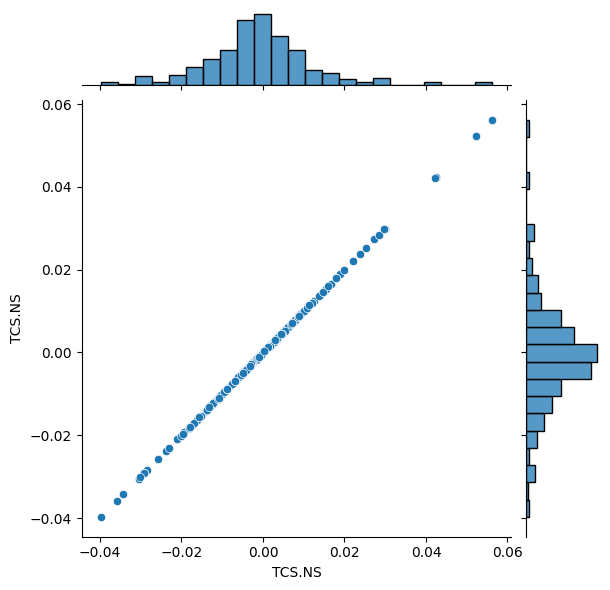

In [131]:
sns.jointplot(data = tech_returns,x = 'TCS.NS',y = 'TCS.NS')
plt.show()

## Plot showing a correlation between TCS,INFy,HCL,TECHM,WIPRO

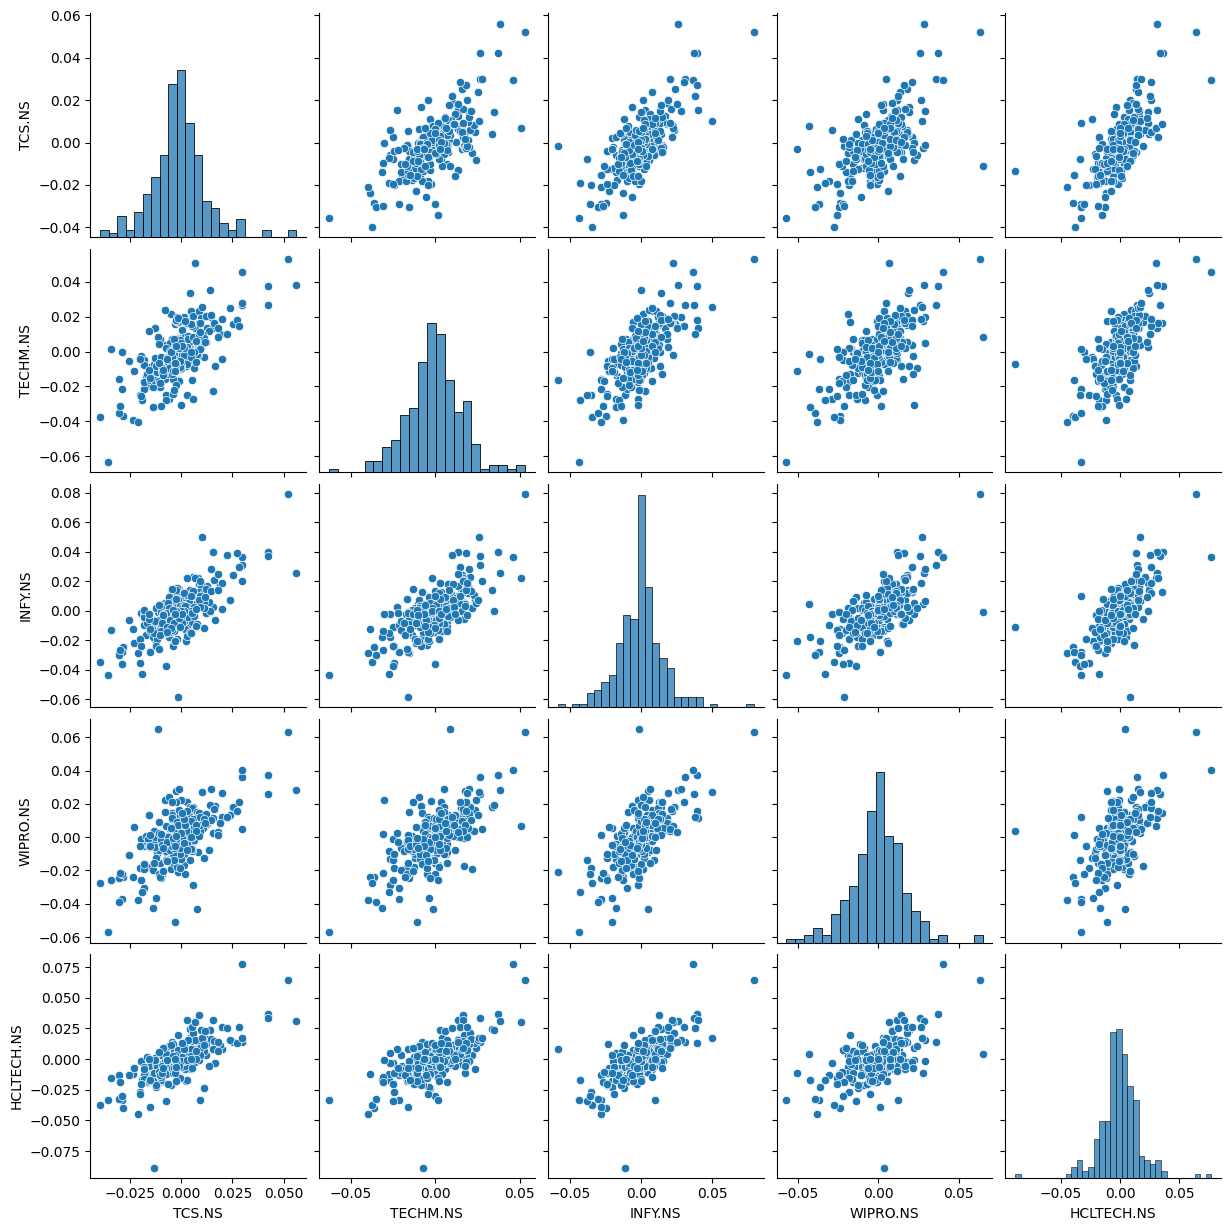

In [134]:
sns.pairplot(tech_returns.dropna())
plt.show()

## Return and Risk of Different Stocks

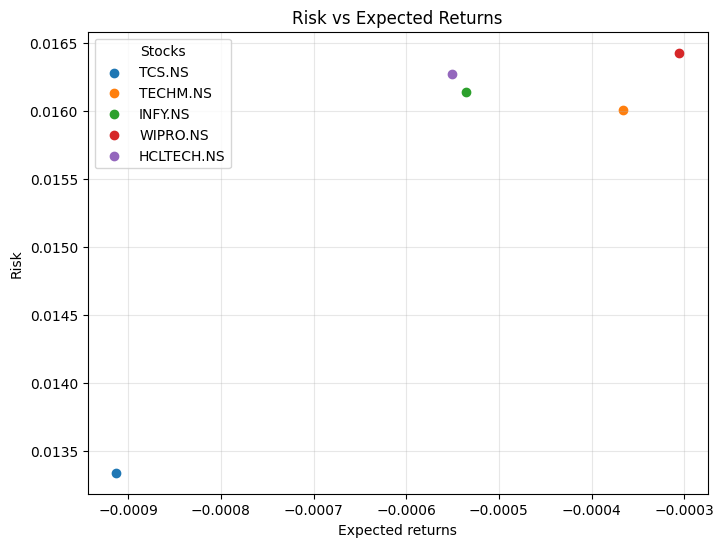

In [137]:
rets = tech_returns.dropna()


plt.figure(figsize=(8,6))

for stock in rets.columns:
    plt.scatter(rets[stock].mean(), rets[stock].std(), label=stock)

plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title('Risk vs Expected Returns')

plt.ticklabel_format(style='plain', axis='both')

plt.legend(title='Stocks', loc='best')

plt.grid(True, alpha=0.3)
plt.show()


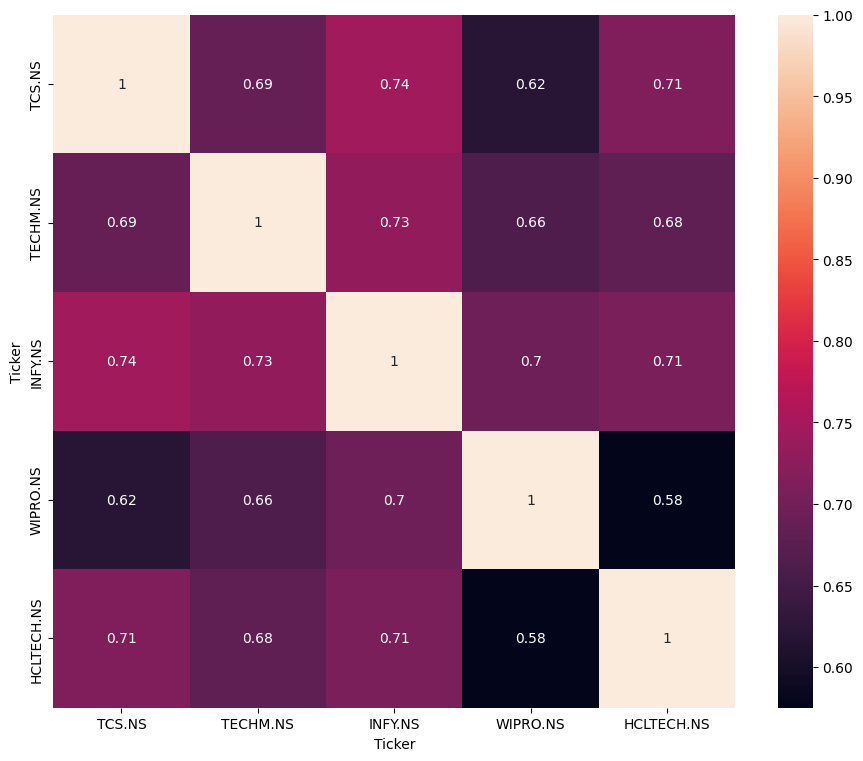

In [52]:
# use sebron for a quick correlation plot for the daily returns

# Compute the correlation matrix
corr = tech_returns.dropna().corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True)
plt.show()